In [361]:
pip install natsort

In [362]:
import glob
import os
import zipfile

from natsort import natsorted

import pandas as pd


In [3]:
weekly_patterns_path = r'/media/gpu/Seagate/weekly_patterns_20211211'
weekly_patterns_path = r'J:\weekly_patterns_20211211'
weekly_patterns_new_path = r'/media/gpu/Seagate/weekly_patterns_20211211/to_cluster2'
weekly_patterns_new_path = r'J:\weekly_patterns_20211211\to_cluster2'
os.makedirs(weekly_patterns_new_path, exist_ok=True)

monthly_patterns_path = r'/media/gpu/Seagate/monthly_patterns_20211211'
monthly_patterns_new_path = r'e'
os.makedirs(monthly_patterns_new_path, exist_ok=True)


weekly_files = glob.glob(os.path.join(weekly_patterns_path, 'Search of All Records-part*.csv.gz'))
weekly_files = natsorted(weekly_files, reverse=True)
print(f'Find weekly files count: {len(weekly_files)}.')

monthly_files = glob.glob(os.path.join(monthly_patterns_path, 'SearchofAllRecords-PATTERNS*.zip'))
monthly_files = natsorted(monthly_files, reverse=True)
print(f'Find monthly files count: {len(monthly_files)}.')

Find weekly files count: 827.
Find monthly files count: 0.


In [262]:
monthly_files[0]
weekly_files[0]

'/media/gpu/Seagate/weekly_patterns_20211211/Search of All Records-part827.csv.gz'

# Convert weekly

In [4]:
def get_new_name(folder, basename, f_ext=None):
    
    if f_ext is None:
        f_ext  = basename.split(".")[-1]
    basename_no_ext = basename[:-(len(f_ext) + 1)]
    
    old_names = glob.glob(os.path.join(folder, f"*.{f_ext}"))
    
    if len(old_names) == 0:
        largest_index = 1
        new_name = os.path.join(folder, basename)
    
    if len(old_names) > 0:
        old_names = natsorted(old_names)
        largest_name = old_names[-1]
        # largest_index = largest_name[:-4].split("_")[-1]
        largest_index = len(old_names)
        new_index = largest_index + 1
        
    new_base_name = f"{basename_no_ext}_{new_index}.{f_ext}"
    new_name = os.path.join(folder, new_base_name)
    
    return new_name
    

get_new_name(folder=r'/media/gpu/Seagate/weekly_patterns_20211211', basename='safegraph_home_panel_summary-part1.csv.gz',f_ext="csv.gz") 

UnboundLocalError: local variable 'new_index' referenced before assignment

In [5]:
def get_new_name(folder, basename, f_ext=None):
    
    if f_ext is None:
        f_ext  = basename.split(".")[-1]
    basename_no_ext = basename[:-(len(f_ext) + 1)]
    
    old_names = glob.glob(os.path.join(folder, f"*.{f_ext}"))
    
    if len(old_names) == 0:
       
        new_index = 1
    
    if len(old_names) > 0:
        old_names = natsorted(old_names)
        largest_name = old_names[-1]
        # largest_index = largest_name[:-4].split("_")[-1]
        largest_index = len(old_names)
        new_index = largest_index + 1
        
    new_base_name = f"{basename_no_ext}_{new_index}.{f_ext}"
    new_name = os.path.join(folder, new_base_name)
    
    return new_name
    
    
def remove_csv_columns(df):
    
    dropped_columns = ['normalized_visits_by_state_scaling',
       'normalized_visits_by_total_visits',
       'normalized_visits_by_total_visitors',
       'normalized_visits_by_region_naics_visits',
       'normalized_visits_by_region_naics_visitors']     
    

    try:
        df = df.drop(columns=dropped_columns)
    except:
        pass

    try:
        df['date_range_end_day'] = df['date_range_end.1']
    except:
        pass

    try:       
        df = df.drop(columns=['date_range_end.1'])
    except:
        pass
    try:
        df = df.drop(columns=['visitor_home_aggregation'])
    except:
        pass
    try:
        df = df.drop(columns=['date_range_start_day'])
    except:
        pass
    
    try:
        df = df.drop(columns=['date_range_end_day'])
    except:
        pass


    df['safegraph_place_id'] = ''
    df['parent_safegraph_place_id'] = ''

    #df.to_csv(new_name, index=False)
    return df
        
usecols = ["brands", 
           "bucketed_dwell_times", 
           "city", 
           "date_range_end", 
           "date_range_start", 
           "device_type", 
           "distance_from_home", 
           "iso_country_code", 
           "location_name", 
           "median_dwell", 
           "parent_placekey", 
           "placekey", 
           "poi_cbg", 
           "postal_code", 
           "raw_visit_counts", 
           "raw_visitor_counts", 
           "region", 
           "related_same_day_brand", 
           "related_same_week_brand", 
           "safegraph_brand_ids", 
           "street_address", 
           "visitor_country_of_origin", 
           "visitor_daytime_cbgs", 
           "visitor_home_cbgs", 
           "visits_by_day", 
           "visits_by_each_hour"]        

for idx, csv_file in enumerate(weekly_files):
    if idx < 546:
        continue
    # csv_file = weekly_files[0]
    print(f"\nLoading {idx + 1} / {len(weekly_files)}: {csv_file} ...") 
    df = pd.read_csv(csv_file)
    old_columns = df.columns
    
    print("  Loding finished.")
    
    df.rename(columns={'date_range_start':'date_range_start_day', 'date_range_end':'date_range_end_day'}, inplace=True)
    new_columns = [col.replace('sg_wp__', '') for col in df.columns]
    df.columns = new_columns
    
    groupby_dfs = [(idx, x) for idx, x in df.groupby('date_range_start_day', as_index=False)]
    
    for pair in groupby_dfs:
        date_start = pair[0]
        pair_df = pair[1]
        print(f"  Current date: {date_start}. len(pair_df): {len(pair_df)}")   
        base_name = date_start.replace("-", "_") 
        base_name = f"{base_name}_row={len(pair_df)}.csv"
        
        year = base_name[:4]
        month = base_name[5:7]
        
        saved_dir = os.path.join(weekly_patterns_new_path, year, month)

        
        
        os.makedirs(saved_dir, exist_ok=True)
        
        saved_file_name = get_new_name(folder=saved_dir, basename=base_name, f_ext='csv')
        
        pair_df = remove_csv_columns(pair_df)
        
        pair_df.to_csv(saved_file_name, index=False)       
        
        #pair_df.to_csv(saved_file_name, index=False, mode='a', header=False)
        
        print(f"  Saved_file_name: {saved_file_name}")

    # print("Old columns:", old_columns)


Loading 547 / 827: J:\weekly_patterns_20211211\Search of All Records-part281.csv.gz ...
  Loding finished.
  Current date: 2018-03-26. len(pair_df): 40397
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\03\2018_03_26_row=40397_392.csv
  Current date: 2018-05-07. len(pair_df): 80921
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\05\2018_05_07_row=80921_459.csv
  Current date: 2018-05-14. len(pair_df): 20445
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\05\2018_05_14_row=20445_460.csv
  Current date: 2018-05-21. len(pair_df): 20635
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\05\2018_05_21_row=20635_461.csv
  Current date: 2018-05-28. len(pair_df): 40453
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\05\2018_05_28_row=40453_462.csv
  Current date: 2018-06-04. len(pair_df): 40625
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\06\2018_06_04_row=40625_445.csv
  Current date: 2018-06-11. 

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


  Loding finished.
  Current date: 2018-04-23. len(pair_df): 41187
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\04\2018_04_23_row=41187_542.csv
  Current date: 2018-05-07. len(pair_df): 20088
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\05\2018_05_07_row=20088_463.csv
  Current date: 2018-05-28. len(pair_df): 20352
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\05\2018_05_28_row=20352_464.csv
  Current date: 2018-06-11. len(pair_df): 20331
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\06\2018_06_11_row=20331_451.csv
  Current date: 2018-07-30. len(pair_df): 40193
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\07\2018_07_30_row=40193_648.csv
  Current date: 2018-08-06. len(pair_df): 20236
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\08\2018_08_06_row=20236_444.csv
  Current date: 2018-10-01. len(pair_df): 20105
  Saved_file_name: J:\weekly_patterns_20211211\to_cluster2\2018\10\20

In [247]:
df[[ 'date_range_end']].sample(2)

,date_range_end
394,2021-07-12
3972,2021-07-12


In [248]:
df['date_range_end'] = df['date_range_end.1']
df = df.drop(columns=['date_range_end.1'])


In [6]:
df = pd.read_csv(r'J:\monthly_patterns_20211211\to_cluster\2021\10\patterns-part1.csv')

In [7]:
df.sample(1)

,Unnamed: 0,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region,postal_code,...,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
173871,173871,222-222@5xq-dz7-zcq,NaN,NaN,NaN,Joe Nightingale Elementary,255 Winter Rd,Orcutt,CA,93455,...,"{""060830020072"":9,""060830020073"":7,""0608300201...","{""US"":67}",1934.0,58.0,"{""<5"":12,""5-10"":135,""11-20"":26,""21-60"":52,""61-...","{""Starbucks"":10,""Jack in the Box"":6,""Walmart"":...","{""Walmart"":59,""Starbucks"":59,""McDonald's"":51,""...","[14,15,15,15,15,15,14,144,129,130,123,126,131,...","{""Monday"":71,""Tuesday"":89,""Wednesday"":92,""Thur...","{""android"":34,""ios"":41}"


In [8]:
[print(c) for c in df.columns]

Unnamed: 0
placekey
safegraph_place_id
parent_placekey
parent_safegraph_place_id
location_name
street_address
city
region
postal_code
safegraph_brand_ids
brands
date_range_start
date_range_end
raw_visit_counts
raw_visitor_counts
visits_by_day
poi_cbg
visitor_home_cbgs
visitor_daytime_cbgs
visitor_country_of_origin
distance_from_home
median_dwell
bucketed_dwell_times
related_same_day_brand
related_same_month_brand
popularity_by_hour
popularity_by_day
device_type


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Convert monthly

In [304]:
monthly_columns_2020 = ["placekey", 
                       #  "safegraph_place_id",  # No such two columns in the new version
                        "parent_placekey", 
                      #  "parent_safegraph_place_id",  #  No such two columns in the new version
                        "location_name", 
                        "street_address", 
                        "city", 
                        "region", 
                        "postal_code", 
                        "safegraph_brand_ids", 
                        "brands", 
                        "date_range_start", 
                        "date_range_end", 
                        "raw_visit_counts", 
                        "raw_visitor_counts", 
                        "visits_by_day", 
                        "poi_cbg", 
                        "visitor_home_cbgs", 
                        "visitor_daytime_cbgs", 
                        "visitor_country_of_origin", 
                        "distance_from_home", 
                        "median_dwell", 
                        "bucketed_dwell_times", 
                        "related_same_day_brand", 
                        "related_same_month_brand", 
                        "popularity_by_hour", 
                        "popularity_by_day", 
                        "device_type"]

def remove_csv_columns(df):
    
    dropped_columns = ['normalized_visits_by_state_scaling',
       'normalized_visits_by_total_visits',
       'normalized_visits_by_total_visitors',
       'normalized_visits_by_region_naics_visits',
       'normalized_visits_by_region_naics_visitors']         

    try:
        df = df.drop(columns=dropped_columns)
    except:
        pass

    try:
        df['date_range_end'] = df['date_range_end.1']
    except:
        pass

    try:       
        df = df.drop(columns=['date_range_end.1'])
    except:
        pass
    try:
        df = df.drop(columns=['visitor_home_aggregation'])
    except:
        pass
    try:
        df = df.drop(columns=['date_range_start_day'])
    except:
        pass
    
    return df
    

# csv_file = monthly_files[0]
for idx, csv_file in enumerate(monthly_files):
    with zipfile.ZipFile(csv_file, mode='r') as z:
        z_names = zipfile.ZipFile.namelist(z)

        month = os.path.basename(csv_file)[28:28+7]
        to_dir = os.path.join(monthly_patterns_new_path, month)
        os.makedirs(to_dir, exist_ok=True)


    #     for z_name in z_names:
    #         f_ext = z_name.split('.')[-1]
    #         file_unzip = z.read(z_name)
    #         if f_ext != 'gz':
    #             print(f_ext)

        print(f"Extracting: {idx + 1} / {len(monthly_files)}, {z_names} ...")
        zipfile.ZipFile.extractall(z, path=to_dir)
        print(f"  Extracting finished.")

        pattern_files = glob.glob(os.path.join(to_dir, "patterns-part*.csv.gz"))

        print(f"  Removing not used columns...")
        for f in pattern_files[:]:
            df = pd.read_csv(f, usecols=monthly_columns_2020)
            df = remove_csv_columns(df)
            df['parent_safegraph_place_id'] = ''        
            df['safegraph_place_id'] = ''

            df.to_csv(f[:-3], index=False)  # remove ".gz", not compress

            os.remove(f)  # delete the compressing file ending with ".gz"

            print(f"  Saved: {f[:-3]}.")

# df

Extracting: 1 / 47, ['patterns-part3.csv.gz', 'normalization_stats.csv', 'home_panel_summary.csv', 'patterns-part1.csv.gz', 'visit_panel_summary.csv', 'patterns-part2.csv.gz', 'patterns-part4.csv.gz'] ...
  Extracting finished.
  Removing not used columns...
  Saved: /media/gpu/Seagate/monthly_patterns_20211211/to_cluster2/2021_11/patterns-part1.csv.
  Saved: /media/gpu/Seagate/monthly_patterns_20211211/to_cluster2/2021_11/patterns-part2.csv.
  Saved: /media/gpu/Seagate/monthly_patterns_20211211/to_cluster2/2021_11/patterns-part3.csv.
  Saved: /media/gpu/Seagate/monthly_patterns_20211211/to_cluster2/2021_11/patterns-part4.csv.
Extracting: 2 / 47, ['patterns-part3.csv.gz', 'normalization_stats.csv', 'home_panel_summary.csv', 'patterns-part1.csv.gz', 'visit_panel_summary.csv', 'patterns-part2.csv.gz', 'patterns-part4.csv.gz'] ...
  Extracting finished.
  Removing not used columns...
  Saved: /media/gpu/Seagate/monthly_patterns_20211211/to_cluster2/2021_10/patterns-part1.csv.
  Saved: /me

In [302]:
# type(file_unzip)
import io


file_like_object = io.BytesIO(file_unzip)
df = pd.read_csv(io.StringIO(file_like_object))


TypeError: initial_value must be str or None, not _io.BytesIO

In [286]:
type(file_unzip)

bytes

In [281]:
from io import BytesIO 



In [270]:
df = pd.read_csv(f, usecols=monthly_columns_2020)
df = remove_csv_columns(df)

df

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,...,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,zzy-22b@5xs-ck7-gc5,NaN,Shell Oil,2 Del Fino Pl,Carmel Valley Village,CA,93924,SG_BRAND_2591c98b70119fe624898b1e424b5e91,Shell Oil,2021-11-01T00:00:00-07:00,...,"{""060530110005"":7,""060530110001"":5,""0605301160...","{""US"":53}",17286.0,6.0,"{""<5"":9,""5-10"":53,""11-20"":4,""21-60"":3,""61-120""...","{""Starbucks"":10,""McDonald's"":9,""Target"":6,""Jac...","{""Starbucks"":56,""Safeway"":48,""McDonald's"":48,""...","[0,0,0,0,0,0,1,7,4,7,5,4,8,7,8,6,7,4,5,3,2,1,0,0]","{""Monday"":15,""Tuesday"":6,""Wednesday"":10,""Thurs...","{""android"":13,""ios"":36}"
1,223-222@5pq-cwp-wkz,NaN,Mfa,304 S Main Ave,Bolivar,MO,65613,NaN,NaN,2021-11-01T00:00:00-05:00,...,"{""291679602004"":9,""291679603002"":6,""2907700010...","{""US"":81}",16339.0,10.0,"{""<5"":7,""5-10"":83,""11-20"":15,""21-60"":50,""61-12...","{""Walmart"":19,""McDonald's"":15,""Dollar General""...","{""Walmart"":84,""Kum & Go"":58,""McDonald's"":58,""D...","[2,3,1,3,4,4,7,29,18,22,25,21,16,20,22,34,20,1...","{""Monday"":37,""Tuesday"":40,""Wednesday"":25,""Thur...","{""android"":48,""ios"":32}"
2,227-222@65z-zjb-389,NaN,Chapman Historical Museum,348 Glen St,Glens Falls,NY,12801,NaN,NaN,2021-11-01T00:00:00-04:00,...,"{""130510040012"":6,""360910601021"":4,""1305101110...","{""US"":37}",6044.0,46.0,"{""<5"":1,""5-10"":18,""11-20"":11,""21-60"":40,""61-12...","{""Cumberland Farms"":8,""Stewart's Shops"":8,""CAR...","{""Stewart's Shops"":71,""McDonald's"":63,""Walmart...","[10,8,8,9,9,11,16,24,27,25,26,22,14,15,24,27,2...","{""Monday"":23,""Tuesday"":30,""Wednesday"":13,""Thur...","{""android"":21,""ios"":19}"
3,zzz-222@63k-ygh-jd9,NaN,Bowie Seagrave Memorial Park,W Ashe St,West Jefferson,NC,28694,NaN,NaN,2021-11-01T00:00:00-04:00,...,"{""370099705004"":9,""370099705003"":7,""3700997040...","{""US"":106}",9851.0,22.0,"{""<5"":5,""5-10"":73,""11-20"":38,""21-60"":79,""61-12...","{""McDonald's"":11,""Dollar General"":7,""Murphy US...","{""McDonald's"":64,""Dollar General"":60,""Bojangle...","[12,11,11,11,12,11,11,21,24,20,16,27,43,31,37,...","{""Monday"":45,""Tuesday"":48,""Wednesday"":30,""Thur...","{""android"":36,""ios"":70}"
4,222-222@8fc-9np-5zz,NaN,Mattresses For Less,5900 North Fwy,Houston,TX,77076,NaN,NaN,2021-11-01T00:00:00-05:00,...,"{""482012212001"":6,""482015503013"":5,""4820125260...","{""US"":79}",21616.0,10.0,"{""<5"":3,""5-10"":46,""11-20"":10,""21-60"":16,""61-12...","{""Shell Oil"":13,""Chevron"":11,""McDonald's"":9,""W...","{""Shell Oil"":69,""Walmart"":66,""Chevron"":65,""Val...","[12,8,4,3,1,1,5,7,5,7,6,10,4,9,8,3,9,4,2,2,2,7...","{""Monday"":15,""Tuesday"":15,""Wednesday"":3,""Thurs...","{""android"":39,""ios"":43}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262472,zzw-223@5qc-xhz-gtv,NaN,7-Eleven,2175 E 9400 S,Sandy,UT,84093,SG_BRAND_2e2448f12fc87fe452e9166153797a7f,7-Eleven,2021-11-01T00:00:00-06:00,...,"{""490351126091"":14,""490351126082"":9,""490351126...","{""US"":214}",3725.0,8.0,"{""<5"":28,""5-10"":224,""11-20"":56,""21-60"":29,""61-...","{""Walmart"":6,""The Home Depot"":6,""McDonald's"":5...","{""McDonald's"":53,""Walmart"":50,""Smith's Food & ...","[4,2,2,1,1,2,1,14,24,33,26,20,42,32,29,42,46,2...","{""Monday"":67,""Tuesday"":63,""Wednesday"":42,""Thur...","{""android"":91,""ios"":117}"
1262473,zzw-222@62k-fkj-2p9,NaN,Westford Solar Park,10 Commerce Rd # 1,Westford,MA,1886,NaN,NaN,2021-11-01T00:00:00-04:00,...,"{""250173181002"":5,""250173184001"":4,""2501731430...","{""US"":15}",4443.0,24.0,"{""<5"":2,""5-10"":14,""11-20"":5,""21-60"":13,""61-120...","{""Market Basket"":12,""Dunkin'"":10,""Best Fitness...","{""Dunkin'"":73,""Market Basket"":60,""Simon mall"":...","[4,4,5,5,4,

In [271]:
df['parent_safegraph_place_id'] = ''        
df['safegraph_place_id'] = ''
df

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,...,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,parent_safegraph_place_id,safegraph_place_id
0,zzy-22b@5xs-ck7-gc5,NaN,Shell Oil,2 Del Fino Pl,Carmel Valley Village,CA,93924,SG_BRAND_2591c98b70119fe624898b1e424b5e91,Shell Oil,2021-11-01T00:00:00-07:00,...,17286.0,6.0,"{""<5"":9,""5-10"":53,""11-20"":4,""21-60"":3,""61-120""...","{""Starbucks"":10,""McDonald's"":9,""Target"":6,""Jac...","{""Starbucks"":56,""Safeway"":48,""McDonald's"":48,""...","[0,0,0,0,0,0,1,7,4,7,5,4,8,7,8,6,7,4,5,3,2,1,0,0]","{""Monday"":15,""Tuesday"":6,""Wednesday"":10,""Thurs...","{""android"":13,""ios"":36}",,
1,223-222@5pq-cwp-wkz,NaN,Mfa,304 S Main Ave,Bolivar,MO,65613,NaN,NaN,2021-11-01T00:00:00-05:00,...,16339.0,10.0,"{""<5"":7,""5-10"":83,""11-20"":15,""21-60"":50,""61-12...","{""Walmart"":19,""McDonald's"":15,""Dollar General""...","{""Walmart"":84,""Kum & Go"":58,""McDonald's"":58,""D...","[2,3,1,3,4,4,7,29,18,22,25,21,16,20,22,34,20,1...","{""Monday"":37,""Tuesday"":40,""Wednesday"":25,""Thur...","{""android"":48,""ios"":32}",,
2,227-222@65z-zjb-389,NaN,Chapman Historical Museum,348 Glen St,Glens Falls,NY,12801,NaN,NaN,2021-11-01T00:00:00-04:00,...,6044.0,46.0,"{""<5"":1,""5-10"":18,""11-20"":11,""21-60"":40,""61-12...","{""Cumberland Farms"":8,""Stewart's Shops"":8,""CAR...","{""Stewart's Shops"":71,""McDonald's"":63,""Walmart...","[10,8,8,9,9,11,16,24,27,25,26,22,14,15,24,27,2...","{""Monday"":23,""Tuesday"":30,""Wednesday"":13,""Thur...","{""android"":21,""ios"":19}",,
3,zzz-222@63k-ygh-jd9,NaN,Bowie Seagrave Memorial Park,W Ashe St,West Jefferson,NC,28694,NaN,NaN,2021-11-01T00:00:00-04:00,...,9851.0,22.0,"{""<5"":5,""5-10"":73,""11-20"":38,""21-60"":79,""61-12...","{""McDonald's"":11,""Dollar General"":7,""Murphy US...","{""McDonald's"":64,""Dollar General"":60,""Bojangle...","[12,11,11,11,12,11,11,21,24,20,16,27,43,31,37,...","{""Monday"":45,""Tuesday"":48,""Wednesday"":30,""Thur...","{""android"":36,""ios"":70}",,
4,222-222@8fc-9np-5zz,NaN,Mattresses For Less,5900 North Fwy,Houston,TX,77076,NaN,NaN,2021-11-01T00:00:00-05:00,...,21616.0,10.0,"{""<5"":3,""5-10"":46,""11-20"":10,""21-60"":16,""61-12...","{""Shell Oil"":13,""Chevron"":11,""McDonald's"":9,""W...","{""Shell Oil"":69,""Walmart"":66,""Chevron"":65,""Val...","[12,8,4,3,1,1,5,7,5,7,6,10,4,9,8,3,9,4,2,2,2,7...","{""Monday"":15,""Tuesday"":15,""Wednesday"":3,""Thurs...","{""android"":39,""ios"":43}",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262472,zzw-223@5qc-xhz-gtv,NaN,7-Eleven,2175 E 9400 S,Sandy,UT,84093,SG_BRAND_2e2448f12fc87fe452e9166153797a7f,7-Eleven,2021-11-01T00:00:00-06:00,...,3725.0,8.0,"{""<5"":28,""5-10"":224,""11-20"":56,""21-60"":29,""61-...","{""Walmart"":6,""The Home Depot"":6,""McDonald's"":5...","{""McDonald's"":53,""Walmart"":50,""Smith's Food & ...","[4,2,2,1,1,2,1,14,24,33,26,20,42,32,29,42,46,2...","{""Monday"":67,""Tuesday"":63,""Wednesday"":42,""Thur...","{""android"":91,""ios"":117}",,
1262473,zzw-222@62k-fkj-2p9,NaN,Westford Solar Park,10 Commerce Rd # 1,Westford,MA,1886,NaN,NaN,2021-11-01T00:00:00-04:00,...,4443.0,24.0,"{""<5"":2,""5-10"":14,""11-20"":5,""21-60"":13,""61-120...","{""Market Basket"":12,""Dunkin'"":10,""Best Fitness...","{""Dunkin'"":73,""Market Basket"":60,""Simon mall"":...","[4,4,5,5,4,4,3,3,3,8,7,1,1,7,8,2,9,8,5,1,5,4,2,3]","{""Monday"":8,""Tuesday"":16,""Wednesday"":4,""Thursd...","{""android"":5,""ios"":8}",,
1262474,zzz-222@5pw-pbg-gx5,NaN,Cowherd Park,Cowherd Park,Aurora,IL,60505,NaN,NaN,2021-11-01T00:00:00-05:00,...,5408.0,16.0,"{""<5"":6,""5-10"":57,""11-20"":20,""21-60"":22,""61-12...","{""CITGO"":9,""BP"":7,""Republic Services"":7,""Walma...","{""Walgreens"":43,""McDonald's"":43,""Walmart"":37,""...","[25,22,20,21,20,18,18,26,30,24,20,26,30,28,30,...","{""M

In [15]:
month_columns = ["placekey", 
           "safegraph_place_id", 
           "parent_placekey", 
           "parent_safegraph_place_id", 
           "location_name", "street_address", 
           "city", "region", "postal_code", 
           "safegraph_brand_ids", 
           "brands", 
           "date_range_start", 
           "date_range_end", 
           "raw_visit_counts", 
           "raw_visitor_counts", 
           "visits_by_day", 
           "poi_cbg", 
           "visitor_home_cbgs", 
           "visitor_daytime_cbgs", 
           "visitor_country_of_origin", 
           "distance_from_home", 
           "median_dwell", 
           "bucketed_dwell_times", 
           "related_same_day_brand",
           "related_same_month_brand", 
           "popularity_by_hour",
           "popularity_by_day", 
           "device_type"]


to_dir = r'L:\monthly_patterns_2021_to_cluster\2019'
from_dir = r'J:\monthly_patterns_20211211\to_cluster2\2019'
import shutil

for month in range(1, 13):
    month = str(month).zfill(2)
    from_month_dir = os.path.join(from_dir, month)
    to_month_dir = os.path.join(to_dir, month)
    os.makedirs(to_month_dir, exist_ok=True)
    files = glob.glob(os.path.join(from_month_dir, "*.csv"))
    #print(to_month_dir, from_month_dir)
    #print(files)
    for f in files:
        new_name = os.path.join(to_month_dir, os.path.basename(f))
        print("Processing:", new_name)
        if '-part' in f:
            print("  Reading csv...")
            df = pd.read_csv(f)
            print("  Saving csv...")
            df[month_columns].to_csv(new_name, index=False)
        else:
            shutil.copyfile(f, new_name)

Processing: L:\monthly_patterns_2021_to_cluster\2019\01\home_panel_summary.csv
Processing: L:\monthly_patterns_2021_to_cluster\2019\01\normalization_stats.csv
Processing: L:\monthly_patterns_2021_to_cluster\2019\01\patterns-part1.csv
  Reading csv...
  Saving csv...
Processing: L:\monthly_patterns_2021_to_cluster\2019\01\patterns-part2.csv
  Reading csv...
  Saving csv...
Processing: L:\monthly_patterns_2021_to_cluster\2019\01\patterns-part3.csv
  Reading csv...
  Saving csv...
Processing: L:\monthly_patterns_2021_to_cluster\2019\01\patterns-part4.csv
  Reading csv...
  Saving csv...
Processing: L:\monthly_patterns_2021_to_cluster\2019\01\visit_panel_summary.csv
Processing: L:\monthly_patterns_2021_to_cluster\2019\02\home_panel_summary.csv
Processing: L:\monthly_patterns_2021_to_cluster\2019\02\normalization_stats.csv
Processing: L:\monthly_patterns_2021_to_cluster\2019\02\patterns-part1.csv
  Reading csv...
  Saving csv...
Processing: L:\monthly_patterns_2021_to_cluster\2019\02\patter

In [10]:
weekly_columns = ["placekey",
                    "safegraph_place_id",
                    "parent_placekey",
                    "parent_safegraph_place_id",
                    "location_name",
                    "street_address",
                    "city",
                    "region",
                    "postal_code",
                    "iso_country_code",
                    "safegraph_brand_ids",
                    "brands",
                    "date_range_start",
                    "date_range_end",
                    "raw_visit_counts",
                    "raw_visitor_counts",
                    "visits_by_day",
                    "visits_by_each_hour",
                    "poi_cbg",
                    "visitor_home_cbgs",
                    "visitor_daytime_cbgs",
                    "visitor_country_of_origin",
                    "distance_from_home",
                    "median_dwell",
                    "bucketed_dwell_times",
                    "related_same_day_brand",
                    "related_same_week_brand",
                    "device_type"]

to_dir   = r'L:\weekly_patterns_20211211\to_cluster3\2021'
from_dir = r'J:\weekly_patterns_20211211\to_cluster2\2021'
import shutil

for month in range(7, 13):
    month = str(month).zfill(2)
    from_month_dir = os.path.join(from_dir, month)
    to_month_dir = os.path.join(to_dir, month)
    os.makedirs(to_month_dir, exist_ok=True)
    files = glob.glob(os.path.join(from_month_dir, "*.csv"))
    #print(to_month_dir, from_month_dir)
    #print(files)
    for f in files:
        new_name = os.path.join(to_month_dir, os.path.basename(f))
        print("Processing:", new_name)
        if '_row=' in f:
            print("  Reading csv...")
            df = pd.read_csv(f)
            print("  Saving csv...")
            df[weekly_columns].to_csv(new_name, index=False)
        else:
            shutil.copyfile(f, new_name)

Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=100873_81.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=101454_108.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=121931_138.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=19768_8.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=19866_10.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=19888_19.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=19923_3.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=19936_20.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_pattern

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_05_row=81134_150.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_12_row=101994_339.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_12_row=102175_437.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_12_row=19987_91.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_12_row=20035_65.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_12_row=20051_244.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_12_row=20051_93.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\07\2021_07_12_row=20127_377.csv
  Reading csv...
  Saving csv...
Processin

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_01_row=86331_598.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_01_row=86725_610.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_01_row=86943_614.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_01_row=87343_188.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_08_row=130672_613.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_08_row=194964_615.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_08_row=195189_620.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_08_row=21328_515.csv
  Reading csv...
  Saving csv...
Proce

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_08_row=86796_554.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_08_row=87515_262.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_15_row=108459_315.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_15_row=108740_115.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_15_row=109250_140.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_15_row=131200_307.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_15_row=21434_544.csv
  Reading csv...
  Saving csv...
Processing: L:\weekly_patterns_20211211\to_cluster3\2021\11\2021_11_15_row=21442_556.csv
  Reading csv...
  Saving csv...
Proc

In [90]:
for csv_file in  monthly_files[1:5]:
    with zipfile.ZipFile(csv_file, mode='r') as z:
        z_names = zipfile.ZipFile.namelist(z)
        print('Processing: ', csv_file)
        month = os.path.basename(csv_file)[28:28+7]
        to_dir = os.path.join(monthly_patterns_new_path, month)
        os.makedirs(to_dir, exist_ok=True)
        zipfile.ZipFile.extractall(z, path=to_dir)
        #pattern_files = glob.glob(os.path.join(to_dir, "patterns-part*.csv.gz"))

Processing:  /media/gpu/Seagate/monthly_patterns_20211211/SearchofAllRecords-PATTERNS-2021_10-2021-12-12.zip
Processing:  /media/gpu/Seagate/monthly_patterns_20211211/SearchofAllRecords-PATTERNS-2021_09-2021-12-12.zip
Processing:  /media/gpu/Seagate/monthly_patterns_20211211/SearchofAllRecords-PATTERNS-2021_08-2021-12-12.zip
Processing:  /media/gpu/Seagate/monthly_patterns_20211211/SearchofAllRecords-PATTERNS-2021_07-2021-12-12.zip


In [ ]:
def convert_monthly(csv_file):
    df = pd.read_csv(csv_file)
    

In [13]:
pd.read_csv(r'K:\weekly_patterns_20211211\to_cluster3\2021\05\2021_05_03_row=19868_12.csv')


,placekey,safegraph_place_id,parent_placekey,parent_safegraph_place_id,location_name,street_address,city,region,postal_code,iso_country_code,...,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type
0,222-222@3bk-jkw-h3q,NaN,NaN,NaN,Trident Seafoods Corporation,111 W Marine Way,Kodiak,AK,99615,US,...,21500003001,"{""021500002002"":4,""021500004001"":4}","{""021500005001"":4}","{""US"":8}",1936.0,130.0,"{""<5"":0,""5-10"":4,""11-20"":3,""21-60"":4,""61-120"":...","{""McDonald's"":14,""CrossFit"":5,""Subway"":5}","{""McDonald's"":60,""CrossFit"":50,""Safeway Pharma...","{""android"":4,""ios"":4}"
1,222-222@3bt-brb-sbk,NaN,NaN,NaN,Sicily's Pizza,171 Muldoon Rd,Anchorage,AK,99504,US,...,20200007032,"{""360450614004"":4}",{},"{""US"":4}",NaN,500.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}"
2,222-222@3bt-gff-q9f,NaN,NaN,NaN,Bering Sea Animal Clinic,23819 Immelman Cir,Chugiak,AK,99567,US,...,20200001013,{},"{""020200027124"":5,""021700009002"":4,""0202000020...","{""US"":6}",28369.0,17.0,"{""<5"":0,""5-10"":2,""11-20"":3,""21-60"":2,""61-120"":...","{""Denny's"":29,""NAPA Auto Parts"":14,""The Home D...","{""Walmart"":29,""Taco Bell"":29,""Three Bears Alas...","{""android"":0,""ios"":4}"
3,222-222@3wq-3tk-6zf,NaN,NaN,NaN,Ketchikan Fire Department Shoreline Station,5401 N Tongass Hwy,Ketchikan,AK,99901,US,...,21300001001,"{""021300001002"":4}","{""021300003001"":4,""021300001001"":4}","{""US"":4}",NaN,152.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":3,""61-120"":...",{},{},"{""android"":0,""ios"":0}"
4,222-222@3x5-34m-9j9,NaN,NaN,NaN,Independent Scholar,34515 N Newport Hwy,Chattaroy,WA,99003,US,...,530630103041,"{""530630103042"":4,""530630102012"":4,""5306301030...","{""530630103041"":4}","{""US"":15}",8125.0,63.0,"{""<5"":1,""5-10"":6,""11-20"":2,""21-60"":9,""61-120"":...","{""ConocoPhillips"":11,""Target"":4,""TownPump Conv...","{""Taco Bell"":31,""ConocoPhillips"":31,""Walmart"":...","{""android"":6,""ios"":6}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19863,zzz-222@8ts-zrw-gc5,NaN,NaN,NaN,Basin 814,Basin 814,Mesa,AZ,85207,US,...,40134201091,"{""040131167311"":4,""040134206031"":4,""0401331840...","{""040133184002"":4,""040134225021"":4,""0401311673...","{""US"":10}",14149.0,141.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":1,""61-120"":...","{""McDonald's"":25,""Chipotle Mexican Grill"":8,""C...","{""Target"":27,""McDonald's"":27,""Fry's Food & Dru...","{""android"":6,""ios"":4}"
19864,zzz-222@8ts-zrx-dd9,NaN,NaN,NaN,Basin 732,Basin 732,Mesa,AZ,85215,US,...,40134202122,{},"{""040134202122"":5}","{""US"":9}",12690.0,9.5,"{""<5"":3,""5-10"":7,""11-20"":2,""21-60"":3,""61-120"":...","{""Chevron"":20,""Westgate Resorts"":13,""QuikTrip""...","{""QuikTrip"":38,""Chevron"":31,""Fry's Food & Drug...","{""android"":9,""ios"":4}"
19865,zzz-222@bp5-yt2-zxq,NaN,NaN,NaN,Kahemano,Kahemano,Lanai City,HI,96763,US,...,150090316011,{},{},{},NaN,24.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":1,""61-120"":...",{},{},"{""android"":0,""ios"":0}"
19866,zzz-223@629-3gb-dqf,NaN,NaN,NaN,Charter Oak Soccer Field,Charter Oak Soccer Field,Manchester,CT,6040,US,...,90035152003,"{""090035041001"":7,""090035148002"":4}","{""090035041001"":4,""060371901002"":4,""0900768020...","{""US"":11}",11658.0,27.5,"{""<5"":0,""5-10"":5,""11-20"":1,""21-60"":6,""61-120"":...","{""Starbucks"":14,""Wendy's"":14,""McDonald's"":14,""...","{""Starbucks"":31,""McDonald's"":31,""Subway"":31,""W...","{""android"":0,""ios"":14}"


# Data check

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
pandas

<module 'pandas' (namespace)>

In [4]:
cols = ['placekey', 'location_name', 'street_address', 'raw_visit_counts', 'raw_visitor_counts']
df_2019_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\to_cluster2\2019\01\*part*.csv')])
df_2019_1                      

,placekey,location_name,street_address,raw_visit_counts,raw_visitor_counts
0,zzw-222@8fc-63c-m6k,Sunday's Metal Building Systems,18962 US Highway 84 E,8,2
1,22g-222@5xc-jv6-xqz,Schmizza,628 NE Broadway St,100,84
2,229-222@5z4-zwk-rzf,LOFT,4730 Admiralty Way,19,18
3,224-222@5qw-f3r-jsq,Itch'n To Stitch,1602 E Bankhead Dr,38,25
4,22z-222@627-s4p-yjv,Gran Colombia Insurance Service,519 60th St,1,1
...,...,...,...,...,...
996520,223-222@628-tgn-gkz,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,125,74
996521,zzw-224@62j-sg8-fj9,The Ellis Room,6 Harvard Sq,77,62
996522,222-222@5qw-9wc-x3q,Compudoc Computers,700 E Quinlan Pkwy,173,72
996523,zzy-222@645-xqy-yqf,MacK's Chapel AME Church,1574 Daniel McLeod Rd,6,6


In [6]:
df_2020_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\to_cluster2\2020\01\*part*.csv')])

In [7]:
df_2021_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\to_cluster2\2021\01\*part*.csv')])

In [8]:
df_2022_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\to_cluster2\2022\01\*part*.csv')])

{'2019': 4465909, '2020': 4557030, '2021': 4462068, '2022': 4615222}

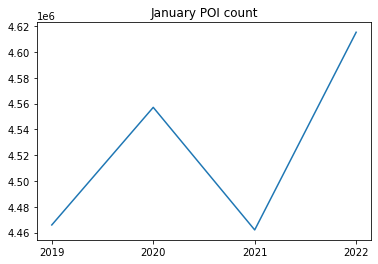

In [44]:
Januray_POI_cnts = {'2019':len(df_2019_1), '2020':len(df_2020_1), '2021':len(raw_df_2021_1), '2022':len(df_2022_1) }

values = Januray_POI_cnts.values()
keys = Januray_POI_cnts.keys()

plt.plot(keys, values)
plt.title("January POI count")
Januray_POI_cnts

{'2019': 1000990370, '2020': 1348211713, '2021': 835889266, '2022': 985289022}

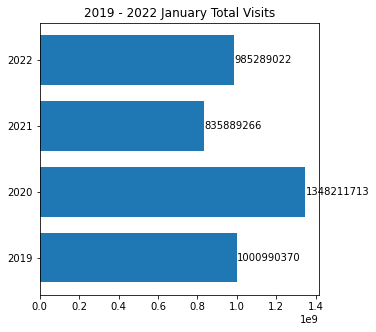

In [216]:
Januray_POI_visits = {'2019':df_2019_1['raw_visit_counts'].sum(), 
                      '2020':df_2020_1['raw_visit_counts'].sum(),
                      '2021':raw_df_2021_1['raw_visit_counts'].sum(),
                      '2022':df_2022_1['raw_visit_counts'].sum()
                                                       }

values = Januray_POI_visits.values()
keys = Januray_POI_visits.keys()

fig, ax = plt.subplots(figsize=(5, 5))
# plt.plot(keys, values)

width = 0.75
ax.barh(range(len(keys)), values, width)
ax.set_yticks(range(len(keys)), list(keys))
ax.set_yticklabels(list(keys))
ax.bar_label(ax.containers[0], fmt='%d')
plt.title("2019 - 2022 January Total Visits")
Januray_POI_visits

{'2019': 1000990370, '2020': 1348211713, '2021': 835889266, '2022': 985289022}

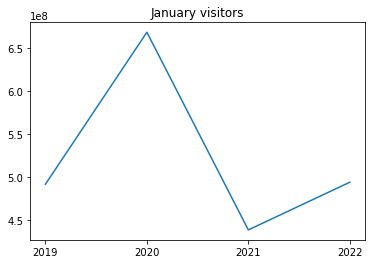

In [217]:
values = Januray_POI_visitors.values()
keys = Januray_POI_visitors.keys()

plt.plot(keys, values)
plt.title("January visitors")
Januray_POI_visits



In [42]:
Januray_POI_visitors = {'2019':df_2019_1['raw_visitor_counts'].sum(), 
                      '2020':df_2020_1['raw_visitor_counts'].sum(),
                      '2021':raw_df_2021_1['raw_visitor_counts'].sum(),
                      '2022':df_2022_1['raw_visitor_counts'].sum()
                                                       }

Januray_POI_visitors

{'2019': 491578451, '2020': 668276371, '2021': 438462624, '2022': 493912525}

## Month raw data check

In [17]:
raw_df_2021_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\SearchofAllRecords-PATTERNS-2021_01-2021-12-12\*part*.gz')])
raw_df_2021_1   

,placekey,location_name,street_address,raw_visit_counts,raw_visitor_counts
0,224-223@63q-rjb-bp9,Tops Xpress,470 Aurora St,915,443
1,224-222@5qs-vxz-rkz,Tamales El Patio,3421 SW 29th St,78,66
2,222-222@63n-zdn-35z,Bucktail Medical Center,1001 Pine St,96,27
3,227-222@8gm-zd4-f75,Five Guys,2731 Legends Pkwy Unit 14,516,388
4,zzz-222@63v-8s2-c89,Jaycee Park South,Baltimore Street,8175,3477
...,...,...,...,...,...
1138550,zzw-224@65z-wqq-8n5,Soar After School Program Parent Site Brandon,17 Neshobe Cir,6,4
1138551,zzw-222@8gh-mb3-vcq,Wishes and Dreams Gift Shop,2817 Highway 71,37,32
1138552,223-222@63c-4v6-7dv,Va Primary Care Outpatient Clinic,404 W Main St,127,82
1138553,zzw-223@5pv-jtb-k9f,Hanger Prosthetics & Orthotics,211 Landmark Dr Ste A5,57,22


In [18]:
raw_df_2021_1['raw_visit_counts'].sum()

835889266

In [19]:
df_2021_1['raw_visitor_counts'].sum()

438462624

## Comparasion: category v.s. shop

In [48]:
cate_df_2021_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\04\13\10\2021\01\*.gz')])
cate_df_2021_1    # differenct from July refill
# cate_df_2021_1['raw_visit_counts'].sum() = 783744516  # backfill on 2021-04-13
# cate_df_2021_1['raw_visitor_counts'].sum() = 413113236 # backfill on 2021-04-13

,placekey,location_name,street_address,raw_visit_counts,raw_visitor_counts
0,225-222@8dh-cwb-nt9,Keys Swimming Pools,1472 74th Street Ocean,73,39
1,zzy-222@8dz-pnb-6rk,Tommy's Full Service,210 Craig Rd,29,20
2,zzw-222@63g-r5v-89z,Bon Secours Pediatric Dental Associates,1850 Pocahontas Trl,1,1
3,225-224@5yv-j9g-snq,Rapid Cash,4241 S Nellis Blvd,20,16
4,225-222@8gd-pwy-zs5,Miles Dale A DMD,316 Stephenson Ave,1,1
...,...,...,...,...,...
1078811,22d-222@629-3d7-xkf,Bahais Of Middletown,45 Spring St Apt 1,8,3
1078812,zzz-222@5xc-jvq-gtv,Columbia Park,Columbia Park,287,134
1078813,zzw-222@5q3-3zp-f9f,Community Connections,339 Highway T14,4,4
1078814,zzy-222@bp4-7rc-59f,Hamakua Mushrooms,36 221 Manowaiopae Homestead Rd,20,19


In [49]:
cate_df_2021_1['raw_visit_counts'].sum()

783744516

In [50]:
cate_df_2021_1['raw_visitor_counts'].sum()

413113236

In [52]:
cate_df_2021_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\07\15\16\2021\01\*.gz')])
# cate_df_2021_1['raw_visit_counts'].sum() = 835889266    # backfill on 2021-07-15  # same as the shop
# cate_df_2021_1['raw_visitor_counts'].sum() = 438462624   # backfill on 2021-07-15

cate_df_2021_1

,placekey,location_name,street_address,raw_visit_counts,raw_visitor_counts
0,224-223@63q-rjb-bp9,Tops Xpress,470 Aurora St,915,443
1,224-222@5qs-vxz-rkz,Tamales El Patio,3421 SW 29th St,78,66
2,222-222@63n-zdn-35z,Bucktail Medical Center,1001 Pine St,96,27
3,227-222@8gm-zd4-f75,Five Guys,2731 Legends Pkwy Unit 14,516,388
4,zzz-222@63v-8s2-c89,Jaycee Park South,Baltimore Street,8175,3477
...,...,...,...,...,...
1133927,zzw-224@65z-wqq-8n5,Soar After School Program Parent Site Brandon,17 Neshobe Cir,6,4
1133928,zzw-222@8gh-mb3-vcq,Wishes and Dreams Gift Shop,2817 Highway 71,37,32
1133929,223-222@63c-4v6-7dv,Va Primary Care Outpatient Clinic,404 W Main St,127,82
1133930,zzw-223@5pv-jtb-k9f,Hanger Prosthetics & Orthotics,211 Landmark Dr Ste A5,57,22


In [53]:
cate_df_2021_1['raw_visit_counts'].sum(), cate_df_2021_1['raw_visitor_counts'].sum()   

(835889266, 438462624)

In [54]:
cate_df_2021_2 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\07\15\16\2021\02\*.gz')])
# cate_df_2021_2['raw_visit_counts'].sum() = 780102023    # backfill on 2021-07-15
# cate_df_2021_2['raw_visitor_counts'].sum() = 412685706   # backfill on 2021-07-15
cate_df_2021_2['raw_visit_counts'].sum(), cate_df_2021_2['raw_visitor_counts'].sum() 

(780102023, 412685706)

In [56]:
cate_df_2020_2 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\07\15\16\2020\02\*.gz')])
# cate_df_2020_2['raw_visit_counts'].sum() = 1209748185    # backfill on 2021-07-15
# cate_df_2020_2['raw_visitor_counts'].sum() = 617260141   # backfill on 2021-07-15
cate_df_2020_2['raw_visit_counts'].sum(), cate_df_2020_2['raw_visitor_counts'].sum() 

(1209748185, 617260141)

In [58]:
shop_df_2021_2 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\SearchofAllRecords-PATTERNS-2021_02-2021-12-12\*part*.gz')])
# shop_df_2021_2['raw_visit_counts'].sum() = 780102023    # backfill on 2021-07-15
# shop_df_2021_2['raw_visitor_counts'].sum() = 412685706   # backfill on 2021-07-15  # same as the category
shop_df_2021_2['raw_visit_counts'].sum(), shop_df_2021_2['raw_visitor_counts'].sum() 

(780102023, 412685706)

In [59]:
shop_df_2021_3 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\SearchofAllRecords-PATTERNS-2021_03-2021-12-12\*part*.gz')])
# shop_df_2021_2['raw_visit_counts'].sum() = 780102023    # backfill on 2021-07-15
# shop_df_2021_2['raw_visitor_counts'].sum() = 412685706   # backfill on 2021-07-15  # same as the category
shop_df_2021_3['raw_visit_counts'].sum(), shop_df_2021_3['raw_visitor_counts'].sum() 

(1009902780, 526312410)

In [61]:
cate_df_2020_3 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'H:\Safegraph\Monthly Places Patterns (aka Patterns) Dec 2020 - Present\patterns_backfill\2021\07\15\16\2020\03\*.gz')])
# cate_df_2020_2['raw_visit_counts'].sum() = 916888043    # backfill on 2021-07-15
# cate_df_2020_2['raw_visitor_counts'].sum() = 480372043   # backfill on 2021-07-15
cate_df_2020_3['raw_visit_counts'].sum(), cate_df_2020_3['raw_visitor_counts'].sum() 

(916888043, 480372043)

In [323]:
cate_df_2020_3['raw_visit_counts'].sum(), cate_df_2020_3['raw_visitor_counts'].sum() 

(916888043, 480372043)

In [326]:
shop_df_2022_1 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\to_cluster\2022\01\*part*.csv')])
# shop_df_2022_1['raw_visit_counts'].sum() = 780102023    # backfill on 2021-07-15
# shop_df_2022_1['raw_visitor_counts'].sum() = 412685706   # backfill on 2021-07-15  # same as the category
shop_df_2022_1['raw_visit_counts'].sum(), shop_df_2022_1['raw_visitor_counts'].sum() 

(985289022, 493912525)

In [325]:
shop_df_2021_4 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\SearchofAllRecords-PATTERNS-2021_04-2021-12-12\*part*.gz')])
# shop_df_2021_4['raw_visit_counts'].sum() = 1015407889    # backfill on 2021-07-15
# shop_df_2021_4['raw_visitor_counts'].sum() = 534013859   # backfill on 2021-07-15  # same as the category
shop_df_2021_4['raw_visit_counts'].sum(), shop_df_2021_4['raw_visitor_counts'].sum() 

(1015407889, 534013859)

In [328]:
shop_df_2020_4 = pd.concat([pd.read_csv(f, usecols=cols) for f in glob.glob(r'J:\monthly_patterns_20211211\SearchofAllRecords-PATTERNS-2020_04-2021-12-12\*part*.gz')])
# shop_df_2020_4['raw_visit_counts'].sum() = 780102023    # backfill on 2021-07-15
# shop_df_2020_4['raw_visitor_counts'].sum() = 412685706   # backfill on 2021-07-15  # same as the category
shop_df_2020_4['raw_visit_counts'].sum(), shop_df_2020_4['raw_visitor_counts'].sum() 

(510482060, 267182618)

In [68]:
over_lap_df = df_2019_1.merge(df_2020_1, left_on='placekey', right_on='placekey', suffixes=('_2019', '_2020'))
over_lap_df

,placekey,location_name_2019,street_address_2019,raw_visit_counts_2019,raw_visitor_counts_2019,location_name_2020,street_address_2020,raw_visit_counts_2020,raw_visitor_counts_2020
0,zzw-222@8fc-63c-m6k,Sunday's Metal Building Systems,18962 US Highway 84 E,8,2,Sunday's Metal Building Systems,18962 US Highway 84 E,4,2
1,22g-222@5xc-jv6-xqz,Schmizza,628 NE Broadway St,100,84,Schmizza,628 NE Broadway St,133,109
2,229-222@5z4-zwk-rzf,LOFT,4730 Admiralty Way,19,18,LOFT,4730 Admiralty Way,19,19
3,224-222@5qw-f3r-jsq,Itch'n To Stitch,1602 E Bankhead Dr,38,25,Itch'n To Stitch,1602 E Bankhead Dr,74,32
4,22z-222@627-s4p-yjv,Gran Colombia Insurance Service,519 60th St,1,1,Gran Colombia Insurance Service,519 60th St,3,3
...,...,...,...,...,...,...,...,...,...
4344065,223-222@628-tgn-gkz,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,125,74,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,120,90
4344066,zzw-224@62j-sg8-fj9,The Ellis Room,6 Harvard Sq,77,62,The Ellis Room,6 Harvard Sq,117,99
4344067,222-222@5qw-9wc-x3q,Compudoc Computers,700 E Quinlan Pkwy,173,72,Compudoc Computers,700 E Quinlan Pkwy,296,144
4344068,zzy-222@645-xqy-yqf,MacK's Chapel AME Church,1574 Daniel McLeod Rd,6,6,MacK's Chapel AME Church,1574 Daniel McLeod Rd,2,2


In [69]:
over_lap_df = over_lap_df.merge(df_2021_1, left_on='placekey', right_on='placekey', suffixes=('', '_2021'))
over_lap_df

,placekey,location_name_2019,street_address_2019,raw_visit_counts_2019,raw_visitor_counts_2019,location_name_2020,street_address_2020,raw_visit_counts_2020,raw_visitor_counts_2020,location_name,street_address,raw_visit_counts,raw_visitor_counts
0,22g-222@5xc-jv6-xqz,Schmizza,628 NE Broadway St,100,84,Schmizza,628 NE Broadway St,133,109,Schmizza,628 NE Broadway St,43,34
1,229-222@5z4-zwk-rzf,LOFT,4730 Admiralty Way,19,18,LOFT,4730 Admiralty Way,19,19,LOFT,4730 Admiralty Way,9,9
2,224-222@5qw-f3r-jsq,Itch'n To Stitch,1602 E Bankhead Dr,38,25,Itch'n To Stitch,1602 E Bankhead Dr,74,32,Itch'n To Stitch,1602 E Bankhead Dr,78,27
3,224-222@5pm-ft3-mc5,United States Postal Service (USPS),7312 Highway 207,33,26,United States Postal Service (USPS),7312 Highway 207,29,25,United States Postal Service (USPS),7312 Highway 207,18,16
4,222-222@8fw-5kr-cdv,El Dorado Furniture,13714 SW 56th St,1721,1234,El Dorado Furniture,13714 SW 56th St,2192,1611,El Dorado Furniture,13714 SW 56th St,1511,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205692,223-222@628-tgn-gkz,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,125,74,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,120,90,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,98,69
4205693,zzw-224@62j-sg8-fj9,The Ellis Room,6 Harvard Sq,77,62,The Ellis Room,6 Harvard Sq,117,99,The Ellis Room,6 Harvard Sq,15,13
4205694,222-222@5qw-9wc-x3q,Compudoc Computers,700 E Quinlan Pkwy,173,72,Compudoc Computers,700 E Quinlan Pkwy,296,144,Compudoc Computers,700 E Quinlan Pkwy,81,63
4205695,zzy-222@645-xqy-yqf,MacK's Chapel AME Church,1574 Daniel McLeod Rd,6,6,MacK's Chapel AME Church,1574 Daniel McLeod Rd,2,2,MacK's Chapel AME Church,1574 Daniel McLeod Rd,1,1


In [74]:
over_lap_df['raw_visit_counts_2019'].sum(), over_lap_df['raw_visit_counts_2020'].sum(), over_lap_df['raw_visit_counts'].sum()

(999480435, 1342701718, 827375575)

In [76]:
over_lap_df['raw_visitor_counts_2019'].sum(), over_lap_df['raw_visitor_counts_2020'].sum(), over_lap_df['raw_visitor_counts'].sum()

(490691013, 664941874, 433285804)

In [ ]:
POI_df = pd.concat([pd.read_csv(f) for f in glob.glob(r'J:\Safegraph\US_POI_20220103\*.gz')])
columns = [c.replace('sg_c__', '') for c in POI_df.columns]
POI_df.columns = columns
# POI_df

In [111]:
over_lap_df = over_lap_df.merge(POI_df, left_on='placekey', right_on='placekey')
over_lap_df

,placekey,location_name_2019,street_address_2019,raw_visit_counts_2019,raw_visitor_counts_2019,location_name_2020,street_address_2020,raw_visit_counts_2020,raw_visitor_counts_2020,location_name_x,...,region,postal_code,iso_country_code,phone_number,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,geometry_type
0,22g-222@5xc-jv6-xqz,Schmizza,628 NE Broadway St,100,84,Schmizza,628 NE Broadway St,133,109,Schmizza,...,OR,97232,US,1.503518e+10,"{ ""Mon"": [[""16:00"", ""20:00""]], ""Tue"": [[""16:00...","Drinks,Pizza,Lunch,Italian Food,Casual Dining,...",NaN,NaN,2019-07-01,POLYGON
1,229-222@5z4-zwk-rzf,LOFT,4730 Admiralty Way,19,18,LOFT,4730 Admiralty Way,19,19,LOFT,...,CA,90292,US,1.310827e+10,"{ ""Mon"": [], ""Tue"": [], ""Wed"": [], ""Thu"": [[""1...",NaN,NaN,NaN,2019-07-01,POLYGON
2,224-222@5qw-f3r-jsq,Itch'n To Stitch,1602 E Bankhead Dr,38,25,Itch'n To Stitch,1602 E Bankhead Dr,74,32,Itch'n To Stitch,...,TX,76086,US,1.817614e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON
3,224-222@5pm-ft3-mc5,United States Postal Service (USPS),7312 Highway 207,33,26,United States Postal Service (USPS),7312 Highway 207,29,25,United States Postal Service (USPS),...,AL,35610,US,1.256248e+10,"{ ""Mon"": [[""0:01"", ""23:59""]], ""Tue"": [[""0:01"",...",NaN,NaN,NaN,2019-07-01,POLYGON
4,222-222@8fw-5kr-cdv,El Dorado Furniture,13714 SW 56th St,1721,1234,El Dorado Furniture,13714 SW 56th St,2192,1611,El Dorado Furniture,...,FL,33175,US,1.305386e+10,"{ ""Mon"": [[""11:00"", ""19:00""]], ""Tue"": [[""11:00...",NaN,2021-04-26,NaN,2019-07-01,POLYGON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949165,222-222@5pj-5qj-xbk,Liberty Middle School,1 District Dr,2453,497,Liberty Middle School,1 District Dr,3257,705,Liberty Middle School,...,IL,62025,US,1.618656e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON
3949166,223-222@628-tgn-gkz,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,125,74,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,120,90,NAMI Mercer NJ,...,NJ,8619,US,1.609800e+10,"{ ""Mon"": [[""9:00"", ""16:30""]], ""Tue"": [[""9:00"",...",NaN,NaN,NaN,2019-07-01,POLYGON
3949167,222-222@5qw-9wc-x3q,Compudoc Computers,700 E Quinlan Pkwy,173,72,Compudoc Computers,700 E Quinlan Pkwy,296,144,Compudoc Computers,...,TX,75474,US,1.903356e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON
3949168,zzy-222@645-xqy-yqf,MacK's Chapel AME Church,1574 Daniel McLeod Rd,6,6,MacK's Chapel AME Church,1574 Daniel McLeod Rd,2,2,MacK's Chapel AME Church,...,NC,28377,US,1.910843e+10,NaN,NaN,NaN,NaN,2019-07-01,POLYGON


In [168]:
over_lap_df['raw_visit_counts_2021'] = over_lap_df['raw_visit_counts']

In [163]:
over_lap_df.columns

Index(['placekey', 'location_name_2019', 'street_address_2019',
       'raw_visit_counts_2019', 'raw_visitor_counts_2019',
       'location_name_2020', 'street_address_2020', 'raw_visit_counts_2020',
       'raw_visitor_counts_2020', 'location_name_x', 'street_address_x',
       'raw_visit_counts', 'raw_visitor_counts', 'parent_placekey',
       'location_name_y', 'safegraph_brand_ids', 'brands', 'top_category',
       'sub_category', 'naics_code', 'latitude', 'longitude',
       'street_address_y', 'city', 'region', 'postal_code', 'iso_country_code',
       'phone_number', 'open_hours', 'category_tags', 'opened_on', 'closed_on',
       'tracking_closed_since', 'geometry_type'],
      dtype='object')

In [137]:

samples_df['raw_visit_counts_2019'].sum(), samples_df['raw_visit_counts_2020'].sum(), samples_df['raw_visit_counts'].sum()

(834, 1183, 626)

<function matplotlib.pyplot.legend(*args, **kwargs)>

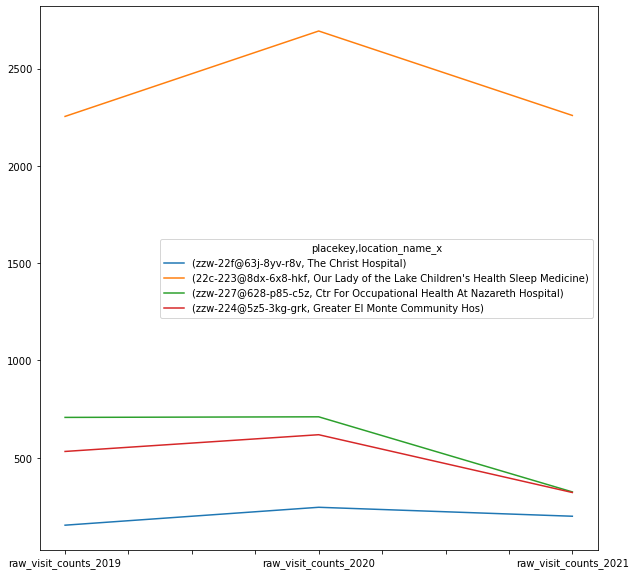

In [290]:
samples_df = over_lap_df[over_lap_df['top_category'] == 'General Medical and Surgical Hospitals'].sample(4)
fig, ax = plt.subplots(figsize=(10, 10))
samples_df.set_index(['placekey', 'location_name_x'])[['raw_visit_counts_2019', 'raw_visit_counts_2020', 'raw_visit_counts_2021']].transpose().plot(ax=ax)
plt.legend

In [252]:

top15_df = over_lap_df.groupby(['top_category'])[['raw_visit_counts_2019', 'raw_visit_counts_2020', 'raw_visit_counts_2021']].sum().nlargest(n=15, columns=['raw_visit_counts_2019'])


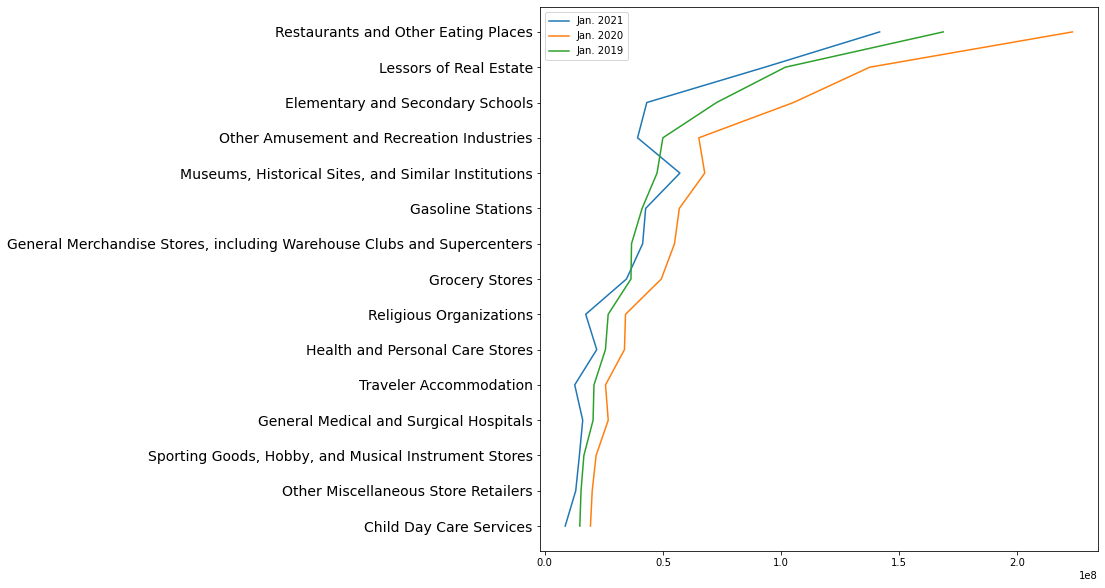

In [322]:
fig, ax = plt.subplots(figsize=(10, 10))
# top15_df.transpose().plot(ax=ax)
# top15_df.plot(ax=ax)
# plt.gca().invert_xaxis()
# plt.xticks(range(len(top15_df.index)), top15_df.index, rotation=90)
import matplotlib
matplotlib.rc('ytick', labelsize=14)
plt.plot(top15_df['raw_visit_counts_2021'], top15_df.index, label='Jan. 2021')
plt.plot(top15_df['raw_visit_counts_2020'], top15_df.index, label='Jan. 2020')
plt.plot(top15_df['raw_visit_counts_2019'], top15_df.index, label='Jan. 2019')
plt.legend()

,raw_visit_counts_2019,raw_visit_counts_2020,raw_visit_counts_2021
top_category,,,
Restaurants and Other Eating Places,168676612,223375858,141744449
Lessors of Real Estate,101801773,137538416,93135862
Elementary and Secondary Schools,72722569,105281389,43178801
Other Amusement and Recreation Industries,49977959,65194835,39257304
"Museums, Historical Sites, and Similar Institutions",47496343,67700005,57185913
Gasoline Stations,41185652,56940724,42686733
"General Merchandise Stores, including Warehouse Clubs and Supercenters",36700920,54899947,41419608
Grocery Stores,36462279,49311509,34566011
Religious Organizations,26823914,34154371,17309174


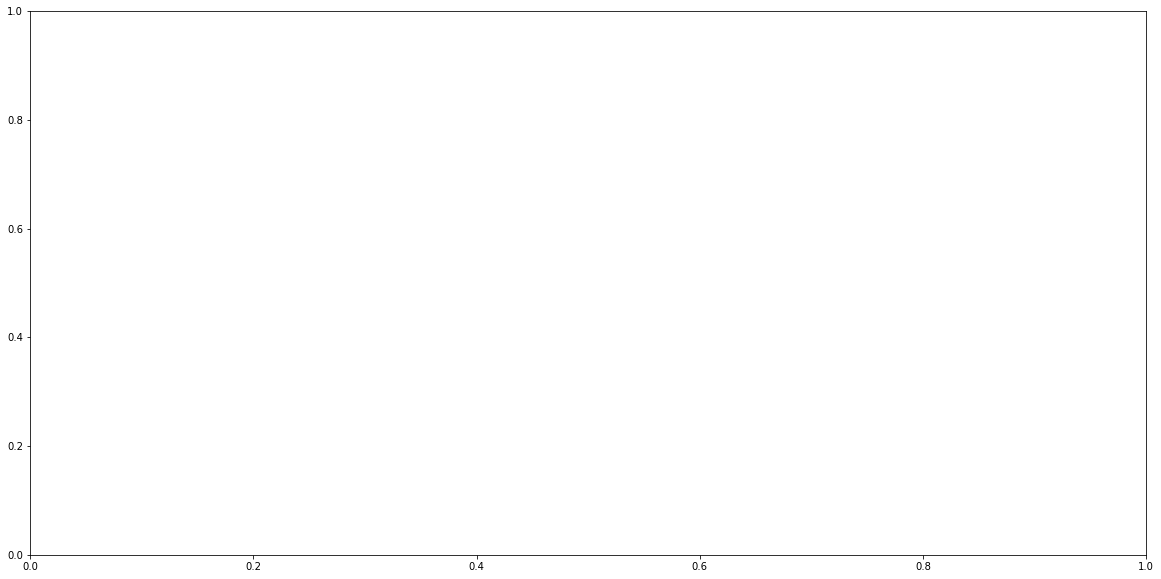

In [219]:
fig, ax = plt.subplots(figsize=(20, 10))
over_lap_df.groupby(['top_category'])[['raw_visit_counts_2019', 'raw_visit_counts_2020', 'raw_visit_counts_2021']].sum().nlargest(n=15, columns=['raw_visit_counts_2019'])#.plot(ax=ax)


In [261]:
top15_df 

,raw_visit_counts_2019,raw_visit_counts_2020,raw_visit_counts_2021
top_category,,,
Child Day Care Services,14809947,19317625,8621369
Other Miscellaneous Store Retailers,15327225,20061807,13082226
"Sporting Goods, Hobby, and Musical Instrument Stores",16534023,21705080,14632657
General Medical and Surgical Hospitals,20429097,26841058,16040301
Traveler Accommodation,20806874,25694792,12656192
Health and Personal Care Stores,25660613,33711683,21968921
Religious Organizations,26823914,34154371,17309174
Grocery Stores,36462279,49311509,34566011
"General Merchandise Stores, including Warehouse Clubs and Supercenters",36700920,54899947,41419608


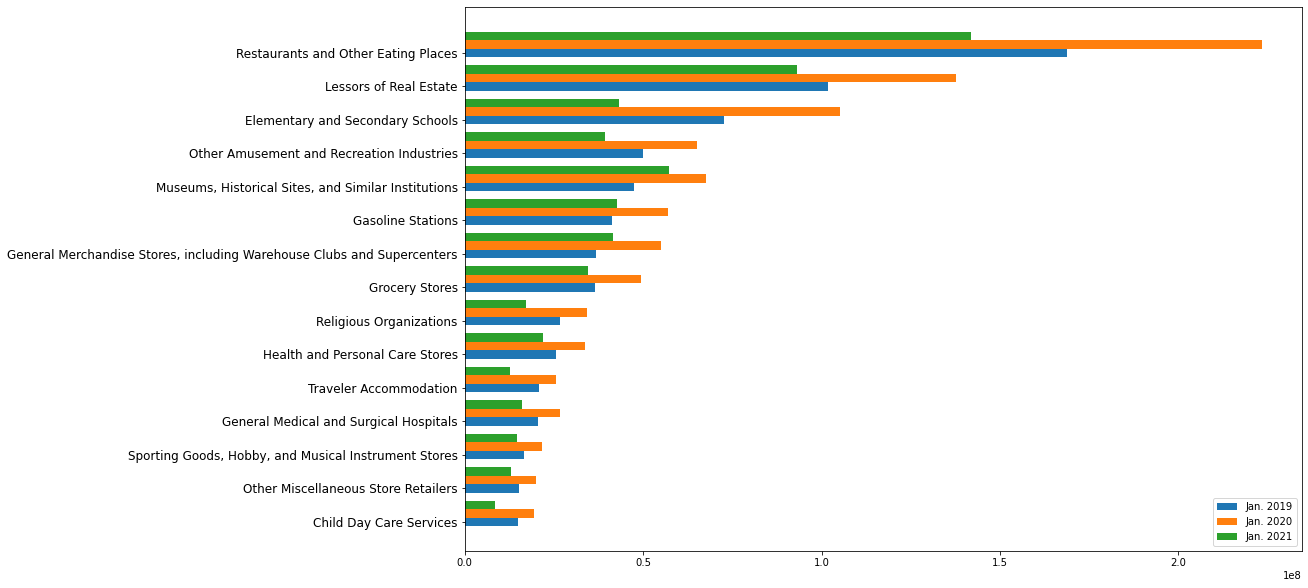

In [272]:
fig, ax = plt.subplots(figsize=(15, 10))
# plt.plot(keys, values)
# top15_df.transpose().plot(ax=ax)
import numpy as np

top15_df = top15_df.sort_values('raw_visit_counts_2019')
y_pos = list(range(len(top15_df.index)))
y_pos = np.array(y_pos)
width = 0.25
ax.barh(range(len(top15_df)), top15_df['raw_visit_counts_2019'], width, label='Jan. 2019')


ax.barh(y_pos + width , top15_df['raw_visit_counts_2020'], width, label='Jan. 2020')

ax.set_yticks(list(y_pos))
ax.set_yticklabels(list(top15_df.index), fontsize=12)

ax.barh(y_pos + width*2 , top15_df['raw_visit_counts_2021'], width, label='Jan. 2021')



ax.legend()
# 
# ax.bar_label(ax.containers[0], fmt='%d')
# plt.title("2019 - 2022 January Total Visits")
# Januray_POI_visits

In [257]:
top15_df

,raw_visit_counts_2019,raw_visit_counts_2020,raw_visit_counts_2021
top_category,,,
Child Day Care Services,14809947,19317625,8621369
Other Miscellaneous Store Retailers,15327225,20061807,13082226
"Sporting Goods, Hobby, and Musical Instrument Stores",16534023,21705080,14632657
General Medical and Surgical Hospitals,20429097,26841058,16040301
Traveler Accommodation,20806874,25694792,12656192
Health and Personal Care Stores,25660613,33711683,21968921
Religious Organizations,26823914,34154371,17309174
Grocery Stores,36462279,49311509,34566011
"General Merchandise Stores, including Warehouse Clubs and Supercenters",36700920,54899947,41419608


In [113]:
over_lap_df.columns

Index(['placekey', 'location_name_2019', 'street_address_2019',
       'raw_visit_counts_2019', 'raw_visitor_counts_2019',
       'location_name_2020', 'street_address_2020', 'raw_visit_counts_2020',
       'raw_visitor_counts_2020', 'location_name_x', 'street_address_x',
       'raw_visit_counts', 'raw_visitor_counts', 'parent_placekey',
       'location_name_y', 'safegraph_brand_ids', 'brands', 'top_category',
       'sub_category', 'naics_code', 'latitude', 'longitude',
       'street_address_y', 'city', 'region', 'postal_code', 'iso_country_code',
       'phone_number', 'open_hours', 'category_tags', 'opened_on', 'closed_on',
       'tracking_closed_since', 'geometry_type'],
      dtype='object')

In [71]:
#over_lap_df = over_lap_df.merge(df_2022_1, left_on='placekey', right_on='placekey', suffixes=('_2021', '_2022'))
#over_lap_df

In [67]:
over_lap_df

,placekey,location_name_2019,street_address_2019,raw_visit_counts_2019,raw_visitor_counts_2019,location_name_2020,street_address_2020,raw_visit_counts_2020,raw_visitor_counts_2020,location_name_2021,street_address_2021,raw_visit_counts_2021,raw_visitor_counts_2021,location_name_2022,street_address_2022,raw_visit_counts_2022,raw_visitor_counts_2022
0,22g-222@5xc-jv6-xqz,Schmizza,628 NE Broadway St,100,84,Schmizza,628 NE Broadway St,133,109,Schmizza,628 NE Broadway St,43,34,Schmizza,628 NE Broadway St,62,51
1,229-222@5z4-zwk-rzf,LOFT,4730 Admiralty Way,19,18,LOFT,4730 Admiralty Way,19,19,LOFT,4730 Admiralty Way,9,9,LOFT,4730 Admiralty Way,11,9
2,224-222@5qw-f3r-jsq,Itch'n To Stitch,1602 E Bankhead Dr,38,25,Itch'n To Stitch,1602 E Bankhead Dr,74,32,Itch'n To Stitch,1602 E Bankhead Dr,78,27,Itch'n To Stitch,1602 E Bankhead Dr,42,20
3,224-222@5pm-ft3-mc5,United States Postal Service (USPS),7312 Highway 207,33,26,United States Postal Service (USPS),7312 Highway 207,29,25,United States Postal Service (USPS),7312 Highway 207,18,16,United States Postal Service (USPS),7312 Highway 207,33,19
4,222-222@8fw-5kr-cdv,El Dorado Furniture,13714 SW 56th St,1721,1234,El Dorado Furniture,13714 SW 56th St,2192,1611,El Dorado Furniture,13714 SW 56th St,1511,1068,El Dorado Furniture,13714 SW 56th St,2019,1434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784452,zzw-222@8fc-fg2-87q,Central Office Solutions,10200 Hempstead Rd,334,100,Central Office Solutions,10200 Hempstead Rd,299,131,Central Office Solutions,10200 Hempstead Rd,140,62,Central Office Solutions,10200 Hempstead Rd,197,43
3784453,222-222@5pj-5qj-xbk,Liberty Middle School,1 District Dr,2453,497,Liberty Middle School,1 District Dr,3257,705,Liberty Middle School,1 District Dr,739,210,Liberty Middle School,1 District Dr,1447,372
3784454,223-222@628-tgn-gkz,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,125,74,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,120,90,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,98,69,NAMI Mercer NJ,1235 Whitehorse Mercerville Rd Ste 303 Bldg C,79,49
3784455,222-222@5qw-9wc-x3q,Compudoc Computers,700 E Quinlan Pkwy,173,72,Compudoc Computers,700 E Quinlan Pkwy,296,144,Compudoc Computers,700 E Quinlan Pkwy,81,63,Compudoc Computers,700 E Quinlan Pkwy,139,69


# Extract month overview file

In [330]:
# weekly_patterns_path = r'/media/gpu/Seagate/weekly_patterns_20211211'
# weekly_patterns_path = r'J:\weekly_patterns_20211211'
# weekly_patterns_new_path = r'/media/gpu/Seagate/weekly_patterns_20211211/to_cluster2'
# weekly_patterns_new_path = r'J:\weekly_patterns_20211211\to_cluster2'
# os.makedirs(weekly_patterns_new_path, exist_ok=True)

monthly_patterns_path = r'J:\monthly_patterns_20211211'
monthly_patterns_new_path = r'J:\monthly_patterns_20211211\to_cluster\Panel_overview_data'
os.makedirs(monthly_patterns_new_path, exist_ok=True)


# weekly_files = glob.glob(os.path.join(weekly_patterns_path, 'Search of All Records-part*.csv.gz'))
# weekly_files = natsorted(weekly_files, reverse=True)
# print(f'Find weekly files count: {len(weekly_files)}.')

monthly_files = glob.glob(os.path.join(monthly_patterns_path, 'SearchofAllRecords-PATTERNS*.zip'))
monthly_files = natsorted(monthly_files, reverse=True)
print(f'Find monthly files count: {len(monthly_files)}.')

NameError: name 'natsorted' is not defined

In [350]:


for idx, csv_file in enumerate(monthly_files):
    with zipfile.ZipFile(csv_file, mode='r') as z:
        z_names = zipfile.ZipFile.namelist(z)

        month = os.path.basename(csv_file)[33:35]
        year = os.path.basename(csv_file)[28:32]
        # to_dir = os.path.join(monthly_patterns_new_path, month)
        # 
        #print(year, month, z_names)


        for z_name in z_names:
            f_ext = z_name.split('.')[-1]
            if f_ext == 'csv':                
                #file_unzip = z.read(z_name)
                to_dir = os.path.join(monthly_patterns_new_path, year, month)
                os.makedirs(to_dir, exist_ok=True)
                new_name = os.path.join(to_dir, z_name)
                # print(z_name, new_name)
                z.extract(z_name, to_dir)
        
            

#         print(f"Extracting: {idx + 1} / {len(monthly_files)}, {z_names} ...")
#         zipfile.ZipFile.extractall(z, path=to_dir)
#         print(f"  Extracting finished.")

#         pattern_files = glob.glob(os.path.join(to_dir, "patterns-part*.csv.gz"))

#         print(f"  Removing not used columns...")
#         for f in pattern_files[:]:
#             df = pd.read_csv(f, usecols=monthly_columns_2020)
#             df = remove_csv_columns(df)
#             df['parent_safegraph_place_id'] = ''        
#             df['safegraph_place_id'] = ''

#             df.to_csv(f[:-3], index=False)  # remove ".gz", not compress

#             os.remove(f)  # delete the compressing file ending with ".gz"

#             print(f"  Saved: {f[:-3]}.")

# Extract weekly overview file

In [359]:
from natsort import natsorted


ModuleNotFoundError: No module named 'natsort'

In [376]:
weekly_patterns_new_path = r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern'
weekly_patterns_path = r'J:\weekly_patterns_20211211'

os.makedirs(weekly_patterns_new_path, exist_ok=True)

## home_panel_summary

In [517]:
weekly_files = glob.glob(os.path.join(weekly_patterns_path, '*home_panel_summary*.csv.gz'))
weekly_files = natsorted(weekly_files, reverse=True)
print(f'Find weekly home_panel_summary files count: {len(weekly_files)}.')

Find weekly home_panel_summary files count: 54.


In [ ]:
from natsort import natsorted


In [518]:
home_panel_df = pd.concat([pd.read_csv(f) for f in weekly_files])



C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\4286067251.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  home_panel_df = pd.concat([pd.read_csv(f) for f in weekly_files])
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\4286067251.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  home_panel_df = pd.concat([pd.read_csv(f) for f in weekly_files])
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\4286067251.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  home_panel_df = pd.concat([pd.read_csv(f) for f in weekly_files])
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\4286067251.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  home_panel_df = pd.concat([pd.read_csv(f) for f in weekly_files])
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\4286067251.py:1: Dty

In [520]:
home_panel_df

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
0,2018-09-17T00:00:00-04:00,2018-09-24T00:00:00-04:00,vt,US,500039712006,31,39
1,2018-09-17T00:00:00-04:00,2018-09-24T00:00:00-04:00,vt,US,500179595004,16,15
2,2018-09-17T00:00:00-04:00,2018-09-24T00:00:00-04:00,vt,US,500259685003,38,49
3,2018-09-17T00:00:00-04:00,2018-09-24T00:00:00-04:00,vt,US,500219621002,33,29
4,2018-09-17T00:00:00-04:00,2018-09-24T00:00:00-04:00,vt,US,500259687003,67,57
...,...,...,...,...,...,...,...
1357649,2021-11-29T00:00:00-07:00,2021-12-06T00:00:00-07:00,yt,CA,CA:60010264,12,7
1357650,2021-11-29T00:00:00-07:00,2021-12-06T00:00:00-07:00,yt,CA,CA:60010252,11,9
1357651,2021-11-29T00:00:00-07:00,2021-12-06T00:00:00-07:00,yt,CA,CA:60010276,8,2
1357652,2021-11-29T00:00:00-07:00,2021-12-06T00:00:00-07:00,yt,CA,CA:60010257,18,4


### Split the dataframe

In [521]:
home_panel_df['date'] = home_panel_df['date_range_start'].str[:10]

In [522]:
len(home_panel_df['date'].unique())

209

In [523]:
all_dates = list(home_panel_df['date'].unique())

In [524]:
groups_df = home_panel_df.groupby(['date'], as_index=True)

In [525]:
for idx, (date, df) in enumerate(groups_df):
    # print(date, df)
    print(f"Processing: {idx + 1} / {len(groups_df)}, {date}")
    year = date[:4]
    month = date[5:7]

    to_dir = os.path.join(weekly_patterns_new_path, year, month)
    os.makedirs(to_dir, exist_ok=True)
    new_name = os.path.join(to_dir, f"{date}_home_panel_summary.csv")
    
    df.drop(columns=['date']).to_csv(new_name, index=False)
    
    print(year, month, new_name)
                                     

print("Done.")

Processing: 1 / 209, 2018-01-01
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-01_home_panel_summary.csv
Processing: 2 / 209, 2018-01-08
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-08_home_panel_summary.csv
Processing: 3 / 209, 2018-01-15
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-15_home_panel_summary.csv
Processing: 4 / 209, 2018-01-22
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-22_home_panel_summary.csv
Processing: 5 / 209, 2018-01-29
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-29_home_panel_summary.csv
Processing: 6 / 209, 2018-02-05
2018 02 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-05_home_panel_summary.csv
Processing: 7 / 209, 2018-02-12
2018 02 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-12_home_panel_summ

In [527]:
df

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date
108385,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,120710803003,32,26,2021-12-27
108386,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,121030254083,256,205,2021-12-27
108387,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,121170213142,358,311,2021-12-27
108388,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,120990019041,53,57,2021-12-27
108389,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,121010330071,25,19,2021-12-27
...,...,...,...,...,...,...,...,...
1032266,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,qc,CA,CA:24850070,7,3,2021-12-27
1032267,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,qc,CA,CA:24940165,3,3,2021-12-27
1032268,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,qc,CA,CA:24930158,10,11,2021-12-27
1032269,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,qc,CA,CA:24840055,6,2,2021-12-27


### Splite normalization_stats

In [530]:
# 
weekly_files = glob.glob(os.path.join(weekly_patterns_path, '*home_panel_summary*.csv.gz'))
normal_files = glob.glob(os.path.join(weekly_patterns_path, '*normalization*.csv.gz'))
normal_stats_df = pd.concat([pd.read_csv(f) for f in normal_files]).sort_values(['month', 'year'])
normal_stats_df

,year,month,day,region,iso_country_code,total_visits,total_devices_seen,total_home_visits,total_home_visitors
95930,2018,1,1,ALL,NaN,22622317,10383832,11183950,8002066
95931,2018,1,1,ALL_CA,CA,30,28,1,1
95932,2018,1,1,ALL_US,US,22622287,10383824,11183949,8002065
95933,2018,1,1,ak,US,28690,15470,14905,11565
95934,2018,1,1,al,US,370434,193045,222863,159699
...,...,...,...,...,...,...,...,...,...
15607,2021,12,5,wa,US,820156,298986,360279,237303
15608,2021,12,5,wi,US,772204,276041,376035,226942
15609,2021,12,5,wv,US,284583,96763,132061,77622
15610,2021,12,5,wy,US,67038,26772,32088,20548


In [531]:
normal_stats_df['date'] = normal_stats_df['year'].astype(str) + "_" + normal_stats_df['month'].astype(str).str.zfill(2) + "_" + normal_stats_df['day'].astype(str).str.zfill(2)
normal_stats_df = normal_stats_df.sort_values('date')
normal_stats_df['date']

95930    2018_01_01
95963    2018_01_01
95964    2018_01_01
95965    2018_01_01
95966    2018_01_01
            ...    
2463     2022_01_02
2462     2022_01_02
2461     2022_01_02
2477     2022_01_02
2513     2022_01_02
Name: date, Length: 102357, dtype: object

In [532]:
normal_stats_df['year_month'] = normal_stats_df['year'].astype(str) + "_" + normal_stats_df['month'].astype(str).str.zfill(2)  
normal_stats_df['year_month']

95930    2018_01
95963    2018_01
95964    2018_01
95965    2018_01
95966    2018_01
          ...   
2463     2022_01
2462     2022_01
2461     2022_01
2477     2022_01
2513     2022_01
Name: year_month, Length: 102357, dtype: object

In [533]:
normal_stats_df['year_week'] = pd.to_datetime(normal_stats_df['date'], format='%Y_%m_%d')
normal_stats_df['year_week'] = normal_stats_df['year_week'].dt.strftime("%Y_%W")#.min()

In [534]:
normal_stats_df['year_week'][:440]

95930    2018_01
95963    2018_01
95964    2018_01
95965    2018_01
95966    2018_01
          ...   
96321    2018_01
96327    2018_01
98127    2018_02
98128    2018_02
98129    2018_02
Name: year_week, Length: 440, dtype: object

In [535]:
normal_stats_df['date'][:440]

95930    2018_01_01
95963    2018_01_01
95964    2018_01_01
95965    2018_01_01
95966    2018_01_01
            ...    
96321    2018_01_07
96327    2018_01_07
98127    2018_01_08
98128    2018_01_08
98129    2018_01_08
Name: date, Length: 440, dtype: object

In [536]:
groups_df = normal_stats_df.groupby(['year_month'], as_index=True)

In [537]:
all_dates = list(normal_stats_df['date'].unique())
all_months = list(normal_stats_df['year_month'].unique())
len(all_months)

49

In [539]:
# Get the starting date of a week
def get_starting_date_week(weekly_dir):
    starting_dates = []
    files = glob.glob(os.path.join(weekly_dir, '*home*.csv'))
    for f in files:
        basename = os.path.basename(f)
        date = basename[:10]
        starting_dates.append(date)
    return starting_dates

# test
get_starting_date_week(weekly_dir=r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01')

['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22', '2018-01-29']

In [541]:
weekly_files = glob.glob(r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\*\*\*home*.csv')
len(weekly_files), weekly_files[-1]

(209,
 'J:\\weekly_patterns_20211211\\Panel_overview_data\\WeeklyPattern\\2021\\12\\2021-12-27_home_panel_summary.csv')

In [542]:
from datetime import datetime, timedelta

for idx, f in enumerate(weekly_files):
    # print(date, df)
    
    date = os.path.basename(f)[:10]
    year = date[:4]
    month = date[5:7]
    
    year_week = datetime.strptime(date, '%Y-%m-%d').strftime("%Y_%W")
    # print(f"Processing: {idx + 1} / {len(groups_df)}, {date}", year_week)

    to_dir = os.path.join(weekly_patterns_new_path, year, month)
    os.makedirs(to_dir, exist_ok=True)
    
    df = normal_stats_df[normal_stats_df['year_week'] == year_week].sort_values('date')
    # print(df)
    # starting_dates = get_starting_date_week(to_dir)
    
    # for starting_date in starting_dates:
        
    # starting_date = datetime.strptime(starting_date, "%Y-%M-%d")
    # end_date = starting_date + timedelta(days=7)

    # year_week = 

    # print(starting_date, end_date)
    new_name = os.path.join(to_dir, f"{date}_normalization_stats.csv")

    df.drop(columns=['year_month', 'date', 'year_week']).to_csv(new_name, index=False)

    print(year, month, year_week, new_name)
                                     

print("Done.")

2018 01 2018_01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-01_normalization_stats.csv
2018 01 2018_02 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-08_normalization_stats.csv
2018 01 2018_03 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-15_normalization_stats.csv
2018 01 2018_04 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-22_normalization_stats.csv
2018 01 2018_05 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-29_normalization_stats.csv
2018 02 2018_06 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-05_normalization_stats.csv
2018 02 2018_07 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-12_normalization_stats.csv
2018 02 2018_08 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-19_normalization_stats.csv
2018 02 2018_09 J:\weekly_patter

In [543]:
df

,year,month,day,region,iso_country_code,total_visits,total_devices_seen,total_home_visits,total_home_visitors,date,year_month,year_week
2081,2021,12,27,wy,US,77561,26622,29624,18913,2021_12_27,2021_12,2021_52
2016,2021,12,27,al,US,1417209,398732,538079,311894,2021_12_27,2021_12,2021_52
2082,2021,12,27,yt,CA,295,168,152,120,2021_12_27,2021_12,2021_52
2011,2021,12,27,ALL,NaN,52288315,15455079,19785079,11951509,2021_12_27,2021_12,2021_52
2012,2021,12,27,ALL_CA,CA,817913,319543,383694,260771,2021_12_27,2021_12,2021_52
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,2021,12,31,yt,CA,364,171,192,131,2021_12_31,2021_12,2021_52
2353,2021,12,31,pe,CA,2719,944,1259,791,2021_12_31,2021_12,2021_52
2351,2021,12,31,or,US,499444,177396,189785,125338,2021_12_31,2021_12,2021_52
2360,2021,12,31,tn,US,1545758,453617,535395,315142,2021_12_31,2021_12,2021_52


### Split visit_panel_summary

In [558]:
visit_panel_files =glob.glob(r'J:\weekly_patterns_20211211\*visit_panel*.csv.gz')

visit_panel_df = pd.concat([pd.read_csv(f) for f in visit_panel_files]).sort_values(['starting_year', 'starting_month', 'starting_day'])
visit_panel_df
visit_panel_df

,starting_year,starting_month,starting_day,region,iso_country_code,num_visits,num_unique_visitors
13752,2018,1,1,ALL,NaN,114151414,15088742
13753,2018,1,1,ALL_CA,CA,115,88
13754,2018,1,1,ALL_US,US,114151299,15088727
13755,2018,1,1,ak,US,150049,23990
13756,2018,1,1,al,US,1927343,282035
...,...,...,...,...,...,...,...
280,2021,12,27,wa,US,2838056,400292
281,2021,12,27,wi,US,3157618,382735
282,2021,12,27,wv,US,1150693,149390
283,2021,12,27,wy,US,315885,41066


In [568]:
visit_panel_df['date'] = visit_panel_df['starting_year'].astype(str) + "-" + visit_panel_df['starting_month'].astype(str).str.zfill(2) + "-" + visit_panel_df['starting_day'].astype(str).str.zfill(2)
visit_panel_df['date']

13752    2018-01-01
13753    2018-01-01
13754    2018-01-01
13755    2018-01-01
13756    2018-01-01
            ...    
280      2021-12-27
281      2021-12-27
282      2021-12-27
283      2021-12-27
284      2021-12-27
Name: date, Length: 14610, dtype: object

In [570]:
visit_panel_df['year_month'] = visit_panel_df['starting_year'].astype(str) + "-" + visit_panel_df['starting_month'].astype(str).str.zfill(2)  
visit_panel_df['year_month']

13752    2018-01
13753    2018-01
13754    2018-01
13755    2018-01
13756    2018-01
          ...   
280      2021-12
281      2021-12
282      2021-12
283      2021-12
284      2021-12
Name: year_month, Length: 14610, dtype: object

In [571]:
all_dates = list(visit_panel_df['date'].unique())
all_months = list(visit_panel_df['year_month'].unique())
len(all_dates)

209

In [572]:
groups_df = visit_panel_df.groupby(['date'], as_index=True)

In [574]:
for idx, (date, df) in enumerate(groups_df):
    # print(date, df)
    # print(f"Processing: {idx + 1} / {len(groups_df)}, {date}")
    year = date[:4]
    month = date[5:7]

    to_dir = os.path.join(weekly_patterns_new_path, year, month)
    os.makedirs(to_dir, exist_ok=True)
    new_name = os.path.join(to_dir, f"{date}_visit_panel_summary.csv")
    
    df.drop(columns=['year_month', 'date']).to_csv(new_name, index=False)
    
    print(year, month, new_name)
                                     

print("Done.")

2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-01_visit_panel_summary.csv
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-08_visit_panel_summary.csv
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-15_visit_panel_summary.csv
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-22_visit_panel_summary.csv
2018 01 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\01\2018-01-29_visit_panel_summary.csv
2018 02 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-05_visit_panel_summary.csv
2018 02 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-12_visit_panel_summary.csv
2018 02 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-19_visit_panel_summary.csv
2018 02 J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2018\02\2018-02-26_visit_p

In [565]:
df

,starting_year,starting_month,starting_day,region,iso_country_code,num_visits,num_unique_visitors,date,year_month
213,2021,12,27,ALL,NaN,214013049,20648499,2021_12_27,2021_12
214,2021,12,27,ALL_CA,CA,2992078,397636,2021_12_27,2021_12
215,2021,12,27,ALL_US,US,211020971,20260246,2021_12_27,2021_12
216,2021,12,27,ab,CA,482919,59761,2021_12_27,2021_12
217,2021,12,27,ak,US,218303,30082,2021_12_27,2021_12
...,...,...,...,...,...,...,...,...,...
280,2021,12,27,wa,US,2838056,400292,2021_12_27,2021_12
281,2021,12,27,wi,US,3157618,382735,2021_12_27,2021_12
282,2021,12,27,wv,US,1150693,149390,2021_12_27,2021_12
283,2021,12,27,wy,US,315885,41066,2021_12_27,2021_12


# Merge files

## Merge weekly files

In [579]:
weekly_patterns_new_path = r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern'
weekly_patterns_path =     r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\*\*\*'

os.makedirs(weekly_patterns_new_path, exist_ok=True)

In [581]:
# home_panel_summary.csv
target_file = 'home_panel_summary.csv'

weekly_files = glob.glob(os.path.join(weekly_patterns_path, f'{weekly_patterns_path}{target_file}'))
weekly_files = natsorted(weekly_files, reverse=True)
print(f'Find weekly home_panel_summary files count: {len(weekly_files)}.')

Find weekly home_panel_summary files count: 209.


In [583]:
new_name = f'{weekly_patterns_new_path}\weekly_{target_file}'
new_name

'J:\\weekly_patterns_20211211\\Panel_overview_data\\WeeklyPattern\\monthly_home_panel_summary.csv'

In [584]:
all_weekly_df = pd.concat(pd.read_csv(f) for f in weekly_files)
all_weekly_df

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
0,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,120710803003,32,26
1,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,121030254083,256,205
2,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,121170213142,358,311
3,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,120990019041,53,57
4,2021-12-27T00:00:00-05:00,2022-01-03T00:00:00-05:00,fl,US,121010330071,25,19
...,...,...,...,...,...,...,...
232377,2018-01-01T00:00:00-05:00,2018-01-08T00:00:00-05:00,fl,US,120710103073,131,156
232378,2018-01-01T00:00:00-05:00,2018-01-08T00:00:00-05:00,fl,US,120860090362,435,452
232379,2018-01-01T00:00:00-05:00,2018-01-08T00:00:00-05:00,fl,US,120860168002,122,102
232380,2018-01-01T00:00:00-05:00,2018-01-08T00:00:00-05:00,fl,US,120619800001,14,24


In [585]:
all_weekly_df.to_csv(new_name, index=False)

In [588]:
target_file = 'normalization_stats.csv'

weekly_files = glob.glob(os.path.join(weekly_patterns_path, f'{weekly_patterns_path}{target_file}'))
weekly_files = natsorted(weekly_files, reverse=True)
print(f'Find weekly normalization_stats.csv files count: {len(weekly_files)}.')

new_name = f'{weekly_patterns_new_path}\weekly_{target_file}'
all_weekly_df = pd.concat(pd.read_csv(f) for f in weekly_files)
all_weekly_df.to_csv(new_name, index=False)



Find weekly normalization_stats.csv files count: 209.


In [589]:
target_file = 'visit_panel_summary.csv'

weekly_files = glob.glob(os.path.join(weekly_patterns_path, f'{weekly_patterns_path}{target_file}'))
weekly_files = natsorted(weekly_files, reverse=True)
print(f'Find weekly visit_panel_summary.csv files count: {len(weekly_files)}.')

new_name = f'{weekly_patterns_new_path}\weekly_{target_file}'
all_weekly_df = pd.concat(pd.read_csv(f) for f in weekly_files)
all_weekly_df.to_csv(new_name, index=False)


Find weekly visit_panel_summary.csv files count: 209.


## Merge monthly files

In [592]:
monthly_patterns_new_path =  r'J:\monthly_patterns_20211211\Panel_overview_data\MonthlyPattern'
monthly_patterns_path =      r'J:\monthly_patterns_20211211\to_cluster\Panel_overview_data\MonthlyPattern\*\*\*'

os.makedirs(monthly_patterns_new_path, exist_ok=True)

In [593]:
target_file = 'visit_panel_summary.csv'

monthly_files = glob.glob(os.path.join(monthly_patterns_path, f'{monthly_patterns_path}{target_file}'))
monthly_files = natsorted(monthly_files, reverse=True)
print(f'Find monthly visit_panel_summary.csv files count: {len(weekly_files)}.')

new_name = f'{monthly_patterns_new_path}\monthly_{target_file}'
all_monthly_df = pd.concat(pd.read_csv(f) for f in monthly_files)
all_monthly_df.to_csv(new_name, index=False)

Find monthly visit_panel_summary.csv files count: 209.


In [594]:
target_file = 'normalization_stats.csv'

monthly_files = glob.glob(os.path.join(monthly_patterns_path, f'{monthly_patterns_path}{target_file}'))
monthly_files = natsorted(monthly_files, reverse=True)
print(f'Find monthly normalization_stats.csv files count: {len(weekly_files)}.')

new_name = f'{monthly_patterns_new_path}\monthly_{target_file}'
all_monthly_df = pd.concat(pd.read_csv(f) for f in monthly_files)
all_monthly_df.to_csv(new_name, index=False)

Find monthly normalization_stats.csv files count: 209.


In [595]:
target_file = 'home_panel_summary.csv'

monthly_files = glob.glob(os.path.join(monthly_patterns_path, f'{monthly_patterns_path}{target_file}'))
monthly_files = natsorted(monthly_files, reverse=True)
print(f'Find monthly home_panel_summary.csv files count: {len(weekly_files)}.')

new_name = f'{monthly_patterns_new_path}\monthly_{target_file}'
all_monthly_df = pd.concat(pd.read_csv(f) for f in monthly_files)
all_monthly_df.to_csv(new_name, index=False)

Find monthly home_panel_summary.csv files count: 209.


C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\1312699230.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  all_monthly_df = pd.concat(pd.read_csv(f) for f in monthly_files)
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\1312699230.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  all_monthly_df = pd.concat(pd.read_csv(f) for f in monthly_files)
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\1312699230.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  all_monthly_df = pd.concat(pd.read_csv(f) for f in monthly_files)
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\1312699230.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  all_monthly_df = pd.concat(pd.read_csv(f) for f in monthly_files)
C:\Users\GPU\AppData\Local\Temp\ipykernel_14140\1312699230.py:8: Dty